560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390000
1400000
1410000
1420000
1430000
1440000
1450000
1460000
1470000
1480000
1490000
1500000
1510000
1520000
1530000
1540000
1550000
1560000
1570000
1580000
1590000
1600000
1610000
1620000
1630000
1640000
1650000
1660000
1670000
1680000
1690000
1700000
1710000
1720000
1730000
1740000
1750000
1760000
1770000
1780000
1790000
1800000
1810000
1820000
1830000
1840000
1850000
1860

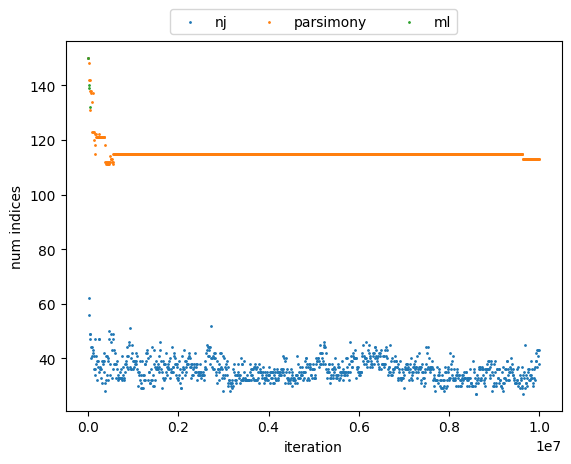

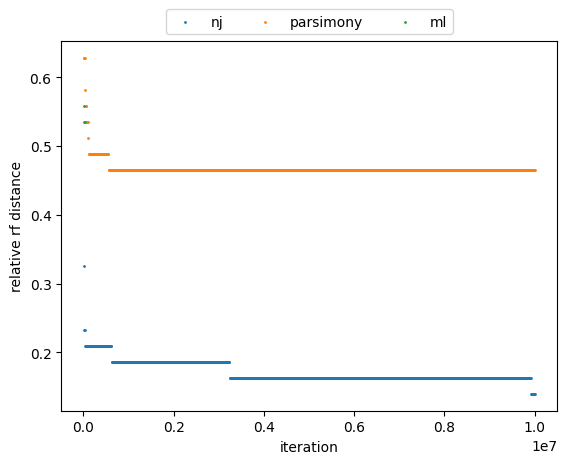

In [14]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import re
from ete3 import Tree

max_rf = 86

def get_index(file):
    block = file.split('/')[-1].split('.')[0].split('_')[-1]
    match = re.match(r"([a-z]+)([0-9]+)", block, re.I)
    if match:
        idx = int(match.groups()[1])
        return idx
    return None

def scatter_dict(d):
    x = list(d.keys())
    x.sort()
    y = [d[key] for key in x]
    return x, y

def print_bit_matrix(bit_matrix_dict, begin, end):
    matrix_matrix = []
    keylist = list(bit_matrix_dict.keys())
    keylist.sort()
    for k in keylist:
        matrix_matrix.append(bit_matrix_dict[k])
    plt.matshow(np.transpose(matrix_matrix[begin:end]), cmap = ListedColormap(['w', 'black']))
    plt.show()
    
def print_change_matrix(bit_matrix_dict, begin, end):
    matrix_matrix = []
    ref = None
    keylist = list(bit_matrix_dict.keys())
    keylist.sort()
    for k in keylist:
        v = bit_matrix_dict[k]
        if ref == None:
            ref = v
            continue
        # 0 : removed 1: no change 2: added
        matrix_matrix.append([v[i] - ref[i] + 1 for i in range(len(ref))])
        ref = v
    plt.matshow(np.transpose(matrix_matrix[begin:end]), cmap = ListedColormap(['red', 'white', 'green']))
    plt.show()
    
    



def get_results(d):
    os.chdir(d)
    files = filter(os.path.isfile, os.listdir(d))
    files = [os.path.join(d, f) for f in files] # add path to each file
    full_alignment_length = 219

    bit_matrix = {}
    indices_matrix = {}
    rfs = {}

    for file in files:
        idx = get_index(file)
        if file.endswith(".csv"):
            indices_file = open(file)
            indices = [int(line[:-1]) for line in indices_file.readlines()]
            indices_matrix[idx] = indices
            bits = [0 for i in range(full_alignment_length)]
            for i in indices:
                bits[i-1] = 1
            bit_matrix[idx] = bits
        if "current_accuracy_step" in file.split("/")[-1]:
            if idx == 1:
                continue
            rf_file = open(file)
            line = rf_file.readlines()[0][:-1]
            if len(line.split('e')) == 2:
                rf = int(float(line))
            else:
                rf = int(line)
            rfs[idx] = rf
    return indices_matrix, rfs, bit_matrix

indices_matrix, rfs, bit_matrix = get_results('/home/luise/master_thesis/scripts/output/project_pavlos/nj_results')
pars_indices_matrix, pars_rfs, pars_bit_matrix = get_results('/home/luise/master_thesis/scripts/output/project_pavlos/pars_results')
ml_indices_matrix, ml_rfs, ml_bit_matrix = get_results('/home/luise/master_thesis/scripts/output/project_pavlos/ml_results')


for i in range(1, 1000):
    if(pars_rfs[i*10000] == 40):
        print(i*10000)

#for i in range(len(pars_bit_matrix[9990000])):
#    if pars_bit_matrix[9990000][i] != pars_bit_matrix[9700000][i]:
#        print("oo")



fig, ax = plt.subplots()
x, y = scatter_dict(indices_matrix)
plt.scatter(x, [len(indices) for indices in y], s=1, label = "nj")
x, y = scatter_dict(pars_indices_matrix)
plt.scatter(x, [len(indices) for indices in y], s=1, label = "parsimony")
x, y = scatter_dict(ml_indices_matrix)
plt.scatter(x, [len(indices) for indices in y], s=1, label = "ml")
plt.xlabel('iteration')
plt.ylabel('num indices')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.show()

fig, ax = plt.subplots()
x, y = scatter_dict(rfs)
plt.scatter(x, [rf/max_rf for rf in y], s=1, label = "nj")
x, y = scatter_dict(pars_rfs)
plt.scatter(x, [rf/max_rf for rf in y], s=1, label = "parsimony")
x, y = scatter_dict(ml_rfs)
plt.scatter(x, [rf/max_rf for rf in y], s=1, label = "ml")
plt.xlabel('iteration')
plt.ylabel('relative rf distance')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.show()

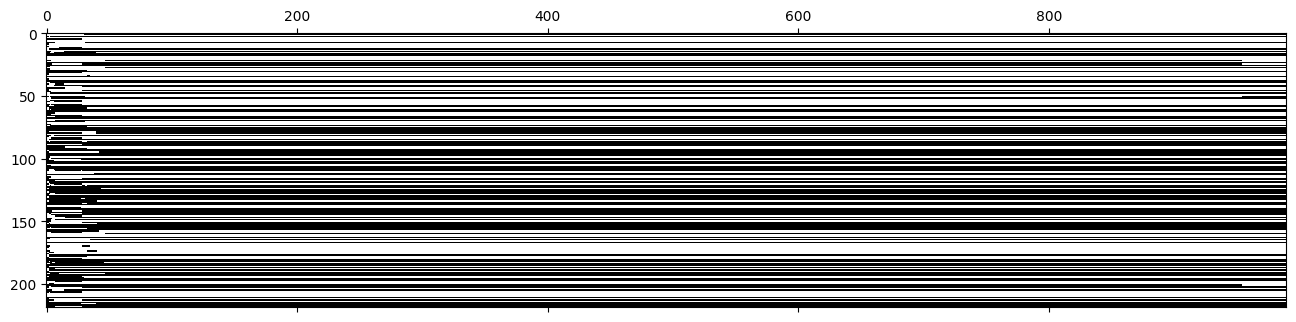

In [10]:
#print_bit_matrix(bit_matrix, 0, 999)
print_bit_matrix(pars_bit_matrix, 9, 999)
#print_change_matrix(bit_matrix, 0, 950)
#print_change_matrix(pars_bit_matrix, 0, 1000)
            

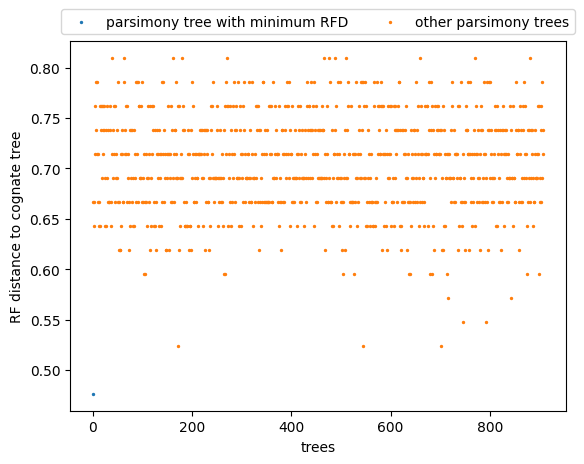

In [15]:

def kinda_bootstrap(d):
    max_rf = 84
    os.chdir(d)
    files = filter(os.path.isfile, os.listdir(d))
    files = [os.path.join(d, f) for f in files] # add path to each file
    full_alignment_length = 219
    cog_tree = Tree('/home/luise/master_thesis/scripts/data/trees/cognate_ie_compatible.tree')
    
    rfs = {}
    rfs_calculated = {}

    for file in files:
        idx = get_index(file)
        if "current_opt_tree" in file.split("/")[-1]:
            tree = Tree(file)
            rf, a, b, c, d,e, f = tree.robinson_foulds(cog_tree, unrooted_trees = True)
            rfs_calculated[idx] = rf
        if "current_accuracy_step" in file.split("/")[-1]:
            if idx == 1:
                continue
            rf_file = open(file)
            line = rf_file.readlines()[0][:-1]
            if len(line.split('e')) == 2:
                rf = int(float(line))
            else:
                rf = int(line)
            rfs[idx] = rf
            
        
    fig, ax = plt.subplots()
    x, y = scatter_dict(rfs)
    
    plt.scatter([0], [y[56]/max_rf], s =2, label = "parsimony tree with minimum RFD")
    x, y = scatter_dict(rfs_calculated)
    plt.scatter(range(1, 909), [y[i]/max_rf for i in range(55, 963)], s =2, label = "other parsimony trees")
    plt.xlabel('trees')
    plt.ylabel('RF distance to cognate tree')
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)        
    x, y = scatter_dict(rfs)

    plt.show()
kinda_bootstrap('/home/luise/master_thesis/scripts/output/project_pavlos/pars_results')

In [12]:
# %load LuiseUtil.py
import os
import shutil
import math
from ete3 import Tree
from Bio import Phylo
import matplotlib
import matplotlib.pyplot as plt
from codecs import decode
import struct

from Bio import Phylo, AlignIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.AlignIO.PhylipIO import PhylipWriter


raxml_ng_path = './../tools/raxml-ng/build/bin/raxml-ng'
standard_raxml_path = './../tools/standard-RAxML-master/raxmlHPC-AVX '

tree_dir = 'data/trees/'
alignment_dir = 'data/language_alignments/'
sitelh_dir = 'data/siteLH/'
drawings_dir = 'output/drawings/'
weight_calibration_dir = 'data/weight_calibration/'
site_congruence_dir = 'data/site_congruence/'
lh_dir = 'data/lh/'
indices_dir = 'data/indices/'


#tree_space_name = 'space.trees'
geo_tree_name = "geo_science.tree"
cognate_tree_name = "cognate_ie_compatible.tree"
cognate_ml_tree_name = "cognate_ml.tree"

morpho_alignment_name = "morpho.phy"



def read_trees_from_ete(tree_set_names):
    trees = []
    for tree_set in tree_set_names:
        l_file = open(tree_dir + tree_set, 'r')
        lines = l_file.readlines()
        for line in lines:
            trees.append(Tree(line))
    return trees

#def read_tree_space_ete():
#    return read_trees_from_ete([tree_space_name])


def eliminate_topological_duplicates_ete(tree_set_name):
    unique_list = []
    tree_set_ete = read_trees_from_ete([tree_set_name])
    i = 0
    for t1 in tree_set_ete:
        print("tree " + str(i))
        unique = True
        for t2 in unique_list:
            rf = rf_distance_ete(t1, t2)
            if rf == 0:
                unique = False
                break
        if unique:
            unique_list.append(t1)
            print(str(len(unique_list)) + " unique trees")
        i = i + 1
    file_name = tree_dir + rm_end(tree_set_name) + '_unique.trees'
    with open(file_name, 'w+') as tree_file:
        for tree in unique_list:
            tree_file.write(tree.write()+"\n")



#def create_tree_space_from(tree_set_names):
#    tree_space_ete = read_trees_from_ete(tree_set_names)
#    file_name = tree_dir + tree_space_name
#    with open(file_name, 'w+') as tree_file:
#        for tree in tree_space_ete:
#            tree_file.write(tree.write()+"\n")
#    print(str(len(tree_space_ete)) + " trees written to " + file_name)

def read_geo_tree_ete():
    return Tree(tree_dir + geo_tree_name)

def read_cognate_tree_ete():
    return Tree(tree_dir + cognate_tree_name)

def rf_distance_ete(t1, t2):
    rf, max_rf, common_leaves, parts_t1, parts_t2,discard_t1, discart_t2 = t1.robinson_foulds(t2, unrooted_trees = True)
    if max_rf == 0:
        print("?!")
        return 0
    return rf/max_rf

def rf_distances_ete(ref_tree, tree_set):
    distances = []
    for tree in tree_set:
        distances.append(rf_distance_ete(ref_tree, tree))
    return distances


def calculate_rf_distances_raxml(ref_tree_name, tree_set_names):
    shutil.rmtree("temp/", ignore_errors=True)
    os.mkdir("temp/")
    dir_string = tree_dir + ref_tree_name
    for tree_set in tree_set_names:
        dir_string = dir_string + tree_dir + tree_set
    os.system("cat " + dir_string + " > temp/all.trees")
    os.system(raxml_ng_path + " --rfdist --tree temp/all.trees --prefix temp/foo > temp/bar.txt")
    l_file = open('temp/foo.raxml.rfDistances', 'r')
    lines = l_file.readlines()
    i = 0
    line = lines[i].split("\t")
    distances = []
    while(line[0] == '0'):
        distances.append(float(line[3]))
        i+=1
        line = lines[i].split("\t")
    shutil.rmtree("temp/", ignore_errors=True)
    return distances


def evaluate_lh_raxml(tree_name, alignment_name, optimize = True):
    optimize_string = ""
    if not optimize:
        optimize_string = " --opt-branches off "
    os.system(raxml_ng_path + ' --evaluate --msa ' + alignment_dir + alignment_name +
            ' --threads 2 --model BIN+G --tree '  + tree_dir + tree_name +  ' --prefix foo --nofiles' +
              optimize_string + '> out.txt')
    l_file = open('out.txt', 'r')
    lines = l_file.readlines()
    lh = 0
    for line in lines:
        if(line.startswith('Final LogLikelihood:')):
            lh = float(line.split(" ")[2].strip())
    os.remove("out.txt")
    return lh







def calculate_site_lh_raxml_ete(tree_ete, alignment_name, optimize= True):
    shutil.rmtree("temp/", ignore_errors=True)
    os.mkdir("temp/")
    tree_ete.write(outfile="temp/foo.tree")
    optimize_string = ""
    if not optimize:
        optimize_string = " --opt-branches off "
    os.system(raxml_ng_path + ' --sitelh --msa ' + alignment_dir + alignment_name +
            ' --threads 2 --model BIN+G --tree temp/foo.tree --prefix temp/foo ' +
              optimize_string + '> temp/bar.txt')
    l_file = open('temp/foo.raxml.log', 'r')
    lines = l_file.readlines()
    lh = 0
    for line in lines:
        if(line.startswith('Final LogLikelihood:')):
            lh = float(line.split(" ")[2].strip())
    with open('temp/foo.raxml.siteLH' , 'r') as file:
        data = (file.read().replace('\n', '')).split(" ")
    #siteLH = [float(data[i]) for i in range(5, len(data))]
    siteLH = [data[i] for i in range(5, len(data))]
    shutil.rmtree("temp/", ignore_errors=True)
    return [lh, siteLH]




def print_tree_with_phylo(tree_name, save = False):
    tree = Phylo.read(tree_dir + tree_name, "newick")
    tree.ladderize()
    fig = plt.figure(figsize=(10, 10), dpi=100)
    axes = fig.add_subplot(1, 1, 1)
    axes.set_title(tree_name)
    Phylo.draw(tree, axes=axes, do_show=False)
    if save:
        plt.savefig(drawings_dir + tree_name + '.png', dpi=fig.dpi)


def fix_beast_output(tree_set_name):
    beast_file = open(tree_dir + tree_set_name, 'r')
    lines = beast_file.readlines()
    i = 0
    while not lines[i].startswith("\tTranslate"):
        i = i+1
    translate = []
    while not lines[i].startswith(";"):
        if lines[i].endswith(",\n"):
            translate.append(lines[i].split(" ")[-1][:-2])
        else:
            translate.append(lines[i].split(" ")[-1][:-1])
        i=i+1
    i = i+1
    with open(tree_dir + rm_end(tree_set_name) + "_fixed.trees" , 'w+') as fixed_file:
        for j in range(i, len(lines)-1):
            tree = Tree(lines[j].split(" ")[-1])
            for leaf in tree.iter_leaves():
                leaf.name = translate[int(leaf.name)]
            fixed_file.write(tree.write() + "\n")

def rm_end(file_name):
    return '.'.join(file_name.split('.') [:-1])

def lh_file_name(tree_set_name, alignment_name, optimize):
    optimize_string = "_opt-branches="
    if optimize:
        optimize_string = optimize_string + "on"
    else:
        optimize_string = optimize_string + "off"
    return lh_dir + rm_end(alignment_name) + '_' + rm_end(tree_set_name)  + optimize_string + '.lh'

def lh_raw_file_name(tree_set_name, alignment_name, optimize):
    optimize_string = "_opt-branches="
    if optimize:
        optimize_string = optimize_string + "on"
    else:
        optimize_string = optimize_string + "off"
    return lh_dir + rm_end(alignment_name) + '_' + rm_end(tree_set_name)  + optimize_string + '_raw.lh'


def site_lh_file_name(tree_name, alignment_name, optimize):
    optimize_string = "_opt-branches="
    if optimize:
        optimize_string = optimize_string + "on"
    else:
        optimize_string = optimize_string + "off"
    return sitelh_dir + rm_end(alignment_name) + '_' + rm_end(tree_name)  + optimize_string + '.raxml.siteLH'

def site_lh_raw_file_name(tree_name, alignment_name, optimize):
    optimize_string = "_opt-branches="
    if optimize:
        optimize_string = optimize_string + "on"
    else:
        optimize_string = optimize_string + "off"
    return sitelh_dir + rm_end(alignment_name) + '_' + rm_end(tree_name)  + optimize_string + '_raw.raxml.siteLH'

def weight_calibration_file_name(tree_name, alignment_name):
    return weight_calibration_dir + rm_end(alignment_name) + '_' + rm_end(tree_name)  + '.raxml.weightCalibration'

def site_congruence_file_name(tree_name, alignment_name):
    return site_congruence_dir + rm_end(alignment_name) + '_' + rm_end(tree_name)  + '.raxml.siteCongruence'

def optimized_tree_file_name(tree_name, alignment_name):
    return tree_dir + rm_end(tree_name) + '_optimized_' + rm_end(alignment_name)  + '.tree'

def ml_trees_file_name(alignment_name, start_trees = ""):
    if start_trees == "":
        return tree_dir + rm_end(alignment_name) + ".raxml.mlTrees"
    else:
        return tree_dir + rm_end(alignment_name) + "_" + start_trees + ".raxml.mlTrees"

def best_tree_file_name(alignment_name, start_trees = ""):
    if start_trees == "":
        return tree_dir + rm_end(alignment_name) + ".raxml.bestTree"
    else:
        return tree_dir + rm_end(alignment_name) + "_" + start_trees + ".raxml.bestTree"


def read_lhs(tree_set_name, alignment_name, optimize):
    lhs = []
    site_lhs = []
    with open(lh_file_name(tree_set_name, alignment_name, optimize) , 'r') as file:
        lines = file.read().split("\n")
    for line in lines[:-1]:
        line_data = line.split("\t")
        lhs.append(float(line_data[0]))
        site_lhs.append([float(el) for el in line_data[1].split(" ")[:-1]])
    return (lhs, site_lhs)

def read_lhs_raw(tree_set_name, alignment_name, optimize):
    lhs = []
    site_lhs = []
    with open(lh_raw_file_name(tree_set_name, alignment_name, optimize) , 'r') as file:
        lines = file.read().split("\n")
    for line in lines[:-1]:
        line_data = line.split("\t")
        lhs.append(float(line_data[0]))
        site_lhs.append([bin_to_float(el) for el in line_data[1].split(" ")[:-1]])
    return (lhs, site_lhs)

def read_site_lh(tree_name, alignment_name, optimize):
    with open(site_lh_file_name(tree_name, alignment_name, optimize) , 'r') as file:
        data = (file.read().replace('\n', '')).split(" ")
    return [float(data[i]) for i in range(5, len(data))]

def read_site_lh_raw(tree_name, alignment_name, optimize):
    with open(site_lh_raw_file_name(tree_name, alignment_name, optimize) , 'r') as file:
        data = (file.read().replace('\n', '')).split(" ")
    return [bin_to_float(data[i]) for i in range(5, len(data))]

def read_weight_calibration(tree_name, alignment_name):
    with open(weight_calibration_file_name(tree_name, alignment_name) , 'r') as file:
        data = file.read().split(" ")
    return [int(data[i]) for i in range(len(data) - 1)]

def read_site_congruence(tree_name, alignment_name):
    with open(site_congruence_file_name(tree_name, alignment_name) , 'r') as file:
        data = file.read().split("\n")
    return [float(data[i].split(" ")[1]) for i in range(len(data) - 1)]

def read_optimized_tree(tree_name, alignment_name):
    return Tree(optimized_tree_file_name(tree_name, alignment_name))

def read_ml_trees(alignment_name, start_trees = ""):
    tree_file = open(ml_trees_file_name(alignment_name, start_trees))
    return [Tree(line[:-1]) for line in tree_file.readlines()]

def read_best_tree(alignment_name, start_trees = ""):
    tree_file = open(best_tree_file_name(alignment_name, start_trees))
    return Tree(tree_file.readlines()[0][:-1])

def calculate_lhs_raxml(tree_set_name, alignment_name, optimize = False):
    tree_set = read_trees_from_ete([tree_set_name])
    results = [calculate_site_lh_raxml_ete(tree, alignment_name, optimize) for tree in tree_set]
    with open(lh_raw_file_name(tree_set_name, alignment_name, optimize), 'w+') as out_file:
        for result in results:
            out_file.write(str(result[0]))
            out_file.write("\t")
            for site_lh in result[1]:
                #out_file.write(str(site_lh))
                out_file.write(site_lh)
                out_file.write(" ")
            out_file.write("\n")

def calculate_site_lh_raxml(tree_name, alignment_name, optimize= True):
    shutil.rmtree("temp/", ignore_errors=True)
    os.mkdir("temp/")
    optimize_string = ""
    if not optimize:
        optimize_string = " --opt-branches off "
    os.system(raxml_ng_path + ' --sitelh --msa ' + alignment_dir + alignment_name +
            ' --threads 2 --model BIN+G --tree '  + tree_dir + tree_name +  ' --prefix temp/foo ' +
              optimize_string + '> temp/bar.txt')
    l_file = open('temp/foo.raxml.log', 'r')
    lines = l_file.readlines()
    lh = 0
    for line in lines:
        if(line.startswith('Final LogLikelihood:')):
            lh = float(line.split(" ")[2].strip())
    #os.system("cat temp/foo.raxml.siteLH > " + site_lh_file_name(tree_name, alignment_name, optimize))
    os.system("cat temp/foo.raxml.siteLH > " + site_lh_raw_file_name(tree_name, alignment_name, optimize))
    with open('temp/foo.raxml.siteLH' , 'r') as file:
        data = (file.read().replace('\n', '')).split(" ")
    #siteLH = [float(data[i]) for i in range(5, len(data))]
    siteLH = [data[i] for i in range(5, len(data))]
    shutil.rmtree("temp/", ignore_errors=True)

def calculate_weight_calibration_raxml(tree_name, alignment_name):
    os.system(standard_raxml_path + ' -f u -p 12345 -t ' + tree_dir + tree_name +
              ' -m BINGAMMA -s ' + alignment_dir + alignment_name +
              ' -n calibration > bar.txt')
    os.system('cat RAxML_weights.calibration > '
              + weight_calibration_file_name(tree_name, alignment_name))
    os.remove('bar.txt')
    os.remove('RAxML_weights.calibration')
    os.remove('RAxML_info.calibration')

def calculate_site_congruence_raxml(tree_name, alignment_name):
    os.system(standard_raxml_path + ' -f S -t ' + tree_dir + tree_name +
              ' -m BINGAMMA -s ' + alignment_dir + alignment_name +
              ' -n congruence > bar.txt')
    os.system('cat RAxML_SiteSpecificPlacementBias.congruence > '
              + site_congruence_file_name(tree_name, alignment_name))
    os.remove('bar.txt')
    os.remove('RAxML_SiteSpecificPlacementBias.congruence')
    os.remove('RAxML_info.congruence')

def calculate_optimized_tree_raxml(tree_name, alignment_name):
    shutil.rmtree("temp/", ignore_errors=True)
    os.mkdir("temp/")
    os.system(raxml_ng_path + ' --evaluate --msa ' + alignment_dir + alignment_name +
            ' --threads 2 --model BIN+G --tree '  + tree_dir + tree_name +  ' --prefix temp/foo ' + '> out.txt')

    shutil.rmtree("temp/", ignore_errors=True)


def calculate_ml_trees_raxml(alignment_name, start_trees = ""):
    shutil.rmtree("temp/", ignore_errors=True)
    os.mkdir("temp/")
    if start_trees == "":
        os.system(raxml_ng_path + ' --msa ' + alignment_dir + alignment_name +
            ' --threads 2 --seed 2 --model BIN+G --prefix temp/foo > temp/bar.txt')
    else:
        os.system(raxml_ng_path + ' --msa ' + alignment_dir + alignment_name +
            ' --tree ' + start_trees +
            ' --threads 2 --seed 2 --model BIN+G --prefix temp/foo > temp/bar.txt')
    os.system('cat temp/foo.raxml.mlTrees > ' + ml_trees_file_name(alignment_name, start_trees))
    os.system('cat temp/foo.raxml.bestTree > ' + best_tree_file_name(alignment_name, start_trees))



def get_site_lh(tree_name, alignment_name, optimize):
    if not os.path.isfile(site_lh_file_name(tree_name, alignment_name, optimize)):
        print("Currently not possible, use site_lh_raw")
        #calculate_site_lh_raxml(tree_name, alignment_name, optimize)
    return read_site_lh(tree_name, alignment_name, optimize)

def get_site_lh_raw(tree_name, alignment_name, optimize):
    if not os.path.isfile(site_lh_raw_file_name(tree_name, alignment_name, optimize)):
        calculate_site_lh_raxml(tree_name, alignment_name, optimize)
    return read_site_lh_raw(tree_name, alignment_name, optimize)


def get_weight_calibration(tree_name, alignment_name):
    if not os.path.isfile(weight_calibration_file_name(tree_name, alignment_name)):
        calculate_weight_calibration_raxml(tree_name, alignment_name)
    return read_weight_calibration(tree_name, alignment_name)

def get_site_congruence(tree_name, alignment_name):
    if not os.path.isfile(site_congruence_file_name(tree_name, alignment_name)):
        calculate_site_congruence_raxml(tree_name, alignment_name)
    return read_site_congruence(tree_name, alignment_name)

def get_optimized_tree(tree_name, alignment_name):
    if not os.path.isfile(optimized_tree_file_name(tree_name, alignment_name)):
        calculate_optimized_tree_raxml(tree_name, alignment_name)
    return read_optimized_tree(tree_name, alignment_name)

def get_double_optimized_tree(tree_name, alignment_name):
    if not os.path.isfile(optimized_tree_file_name(tree_name, alignment_name)):
        calculate_optimized_tree_raxml(tree_name, alignment_name)
    optimized_tree_name = optimized_tree_file_name(tree_name, alignment_name).split('/')[-1]
    if not os.path.isfile(optimized_tree_file_name(optimized_tree_name, alignment_name)):
        calculate_optimized_tree_raxml(optimized_tree_name, alignment_name)
    return read_optimized_tree(optimized_tree_name, alignment_name)


def get_optimized_tree(tree_name, alignment_name):
    if not os.path.isfile(optimized_tree_file_name(tree_name, alignment_name)):
        calculate_optimized_tree_raxml(tree_name, alignment_name)
    return read_optimized_tree(tree_name, alignment_name)


def get_lhs(tree_set_name, alignment_name, optimize):
    if not os.path.isfile(lh_file_name(tree_set_name, alignment_name, optimize)):
        #calculate_lhs_raxml(tree_set_name, alignment_name, optimize)
        print("Currently not possible, use lhs_raw")
    return read_lhs(tree_set_name, alignment_name, optimize)

def get_lhs_raw(tree_set_name, alignment_name, optimize):
    if not os.path.isfile(lh_raw_file_name(tree_set_name, alignment_name, optimize)):
        calculate_lhs_raxml(tree_set_name, alignment_name, optimize)
    return read_lhs_raw(tree_set_name, alignment_name, optimize)


def get_ml_trees(alignment_name, start_trees = ""):
    if not os.path.isfile(ml_trees_file_name(alignment_name, start_trees)):
        calculate_ml_trees_raxml(alignment_name, start_trees)
    return read_ml_trees(alignment_name, start_trees)

def get_best_tree(alignment_name, start_trees = ""):
    if not os.path.isfile(best_tree_file_name(alignment_name, start_trees)):
        calculate_ml_trees_raxml(alignment_name, start_trees)
    return read_best_tree(alignment_name, start_trees)





def average_branch_length(tree_set):
    avg = 0
    cnt = 0
    for tree in tree_set:
        for node in tree.traverse():
            avg = avg + node.dist
            cnt = cnt + 1
    avg = avg / cnt
    return avg



def interval_branch_length(tree_set):
    lower = 1
    upper = 0
    for tree in tree_set:
        for node in tree.traverse():
            lower = min(lower, node.dist)
            upper = max(upper, node.dist)
    return (lower, upper)



def variance_branch_length(tree_set):
    avg = average_branch_length(tree_set)
    var = 0
    cnt = 0
    for tree in tree_set:
        for node in tree.traverse():
            diff = node.dist - avg
            var = var + (diff * diff)
            cnt = cnt + 1
    return var / cnt


def bin_to_float(b):
    return struct.unpack('>d', decode('%%0%dx' % (8 << 1) % int(b, 2), 'hex')[-8:])[0]













In [13]:
os.chdir('/home/luise/master_thesis/scripts/')

tree_dict = {}
tree_dict["cg tree"] = Tree(tree_dir + "cognate_ie_compatible.tree")
tree_dict["ml tree"] = get_best_tree("morpho_filtered_indsToUse.phy")
tree_dict["nj tree"] = Tree(tree_dir + "current_opt_tree_large_step10000000.nwk")
tree_dict["ps tree"] = Tree(tree_dir + "pars_current_opt_tree_large_step10000000.nwk")


for i, name1 in enumerate(tree_dict):
    for j, name2 in enumerate(tree_dict):
        if name2 <= name1:
            continue
        rf_str = str(rf_distance_ete(tree_dict[name1], tree_dict[name2]))
        print("RF distance of " + name1 + " to " + name2 + ": " + rf_str)
    
    

RF distance of cg tree to ml tree: 0.8837209302325582
RF distance of cg tree to nj tree: 0.13953488372093023
RF distance of cg tree to ps tree: 0.7857142857142857
RF distance of ml tree to nj tree: 0.813953488372093
RF distance of ml tree to ps tree: 0.7619047619047619
RF distance of nj tree to ps tree: 0.7380952380952381
